Устанавливает пакеты

In [7]:
!pip install fdd-defense.zip -q

In [8]:
!pip install git+https://github.com/airi-industrial-ai/fddbenchmark -q

In [22]:
from fddbenchmark import FDDDataset, FDDDataloader, FDDEvaluator
from fdd_defense.models.base import BaseTorchModel
from fdd_defense.models import MLP
from fdd_defense.attacks import FGSMAttack
import torch. nn as nn
from torch.optim import Adam
import torch
import torch.nn.functional as F
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

Загружаем маленький теп

In [26]:
dataset = FDDDataset(name='small_tep')
dataset.df.head()

Reading data/small_tep/test_mask.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 153300/153300 [00:00<00:00, 1787360.36it/s]


xmeas_1  xmeas_2  xmeas_3  xmeas_4  xmeas_5  xmeas_6  \
run_id    sample                                                         
413402073 1       0.25038   3674.0   4529.0   9.2320   26.889   42.402   
          2       0.25109   3659.4   4556.6   9.4264   26.721   42.576   
          3       0.25038   3660.3   4477.8   9.4426   26.875   42.070   
          4       0.24977   3661.3   4512.1   9.4776   26.758   42.063   
          5       0.29405   3679.0   4497.0   9.3381   26.889   42.650   

                  xmeas_7  xmeas_8  xmeas_9  xmeas_10  ...   xmv_2   xmv_3  \
run_id    sample                                       ...                   
413402073 1        2704.3   74.863   120.41   0.33818  ...  53.744  24.657   
          2        2705.0   75.000   120.41   0.33620  ...  53.414  24.588   
          3        2706.2   74.771   120.42   0.33563  ...  54.357  24.666   
          4        2707.2   75.224   120.39   0.33553  ...  53.946  24.725   
          5        2705.1   75.388   120.39   0.32632  ...  53.658  28.797   

                   xmv_4   xmv_5   xmv_6   xmv_7   xmv_8   xmv_9  xmv_10  \
run_id    sample                                                           
413402073 1       62.544  22.137  39.935  42.323  47.757  47.510  41.258   
          2       59.259  22.084  40.176  38.554  43.692  47.427  41.359   
          3       61.275  22.380  40.244  38.990  46.699  47.468  41.199   
          4       59.856  22.277  40.257  38.072  47.541  47.658  41.643   
          5       60.717  21.947  39.144  41.955  47.645  47.346  41.507   

                  xmv_11  
run_id    sample          
413402073 1       18.447  
          2       17.194  
          3       20.530  
          4       18.089  
          5       18.461  

[5 rows x 52 columns]

In [27]:
scaler = StandardScaler()
scaler.fit(dataset.df[dataset.train_mask])
dataset.df[:] = scaler.transform(dataset.df)

Обучаем целевую модель

In [28]:
window_size = 10

fddmodel = MLP(
        window_size=window_size,
        step_size=1,
        hidden_dim=209,
        num_epochs=30,
        batch_size=366,
        lr=0.002401,
    )
fddmodel.fit(dataset)

Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1754.69it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0238


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6330


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5168


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4486


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4079


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3833


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3669


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3571


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3468


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3381


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3309


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3251


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3185


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3127


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3049


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2988


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2934


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2890


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2850


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2817


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2795


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2757


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2723


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2681


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2662


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2643


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2642


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2690


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2718


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2606


Замеряем метрики на тестовой выборке

In [29]:
test_loader = FDDDataloader(
    dataframe=dataset.df,
    mask=dataset.test_mask,
    labels=dataset.labels,
    window_size=window_size,
    step_size=1,
)
for sample, index, label in test_loader:
    pred = fddmodel.predict(sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1182.92it/s]


FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9932/0.0000
    Fault 02: 0.9890/0.0005
    Fault 03: 0.5775/0.0583
    Fault 04: 0.9857/0.0001
    Fault 05: 0.9730/0.0000
    Fault 06: 0.9982/0.0000
    Fault 07: 0.9985/0.0000
    Fault 08: 0.8466/0.0042
    Fault 09: 0.0003/0.0000
    Fault 10: 0.7962/0.0194
    Fault 11: 0.9227/0.0012
    Fault 12: 0.7151/0.0010
    Fault 13: 0.8658/0.0089
    Fault 14: 0.9940/0.0000
    Fault 15: 0.0003/0.0000
    Fault 16: 0.8180/0.0092
    Fault 17: 0.9389/0.0001
    Fault 18: 0.8225/0.0061
    Fault 19: 0.9039/0.0195
    Fault 20: 0.8748/0.0134
Detection TPR: 0.8790
Detection FPR: 0.1419
Average Detection Delay (ADD): 2.92
Total Correct Diagnosis Rate (Total CDR): 0.9109

Clustering metrics
-----------------
Adjusted Rand Index (ARI): 0.5987
Normalized Mutual Information (NMI): 0.7792
Unsupervised Clustering Accuracy (ACC): 0.8121


# Атакуем нашу модель обученную на samll_tep

In [30]:
attack = FGSMAttack(model=fddmodel, eps=0.05)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

## Замеряем метрики на атакованных данных

In [31]:
pred = fddmodel.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9584/0.0014
    Fault 02: 0.9357/0.0164
    Fault 03: 0.0000/0.4291
    Fault 04: 0.1927/0.0061
    Fault 05: 0.3712/0.0145
    Fault 06: 0.9915/0.0002
    Fault 07: 0.9842/0.0000
    Fault 08: 0.6160/0.0412
    Fault 09: 0.0000/0.0078
    Fault 10: 0.3589/0.0512
    Fault 11: 0.5594/0.0724
    Fault 12: 0.5800/0.0047
    Fault 13: 0.7687/0.0292
    Fault 14: 0.8693/0.0006
    Fault 15: 0.0000/0.0002
    Fault 16: 0.3882/0.1220
    Fault 17: 0.8706/0.0129
    Fault 18: 0.7592/0.0109
    Fault 19: 0.2461/0.0843
    Fault 20: 0.5352/0.0881
Detection TPR: 0.9148
Detection FPR: 0.9930
Average Detection Delay (ADD): 0.95
Total Correct Diagnosis Rate (Total CDR): 0.6005

Clustering metrics
-----------------
Adjusted Rand Index (ARI): 0.3047
Normalized Mutual Information (NMI): 0.5270
Unsupervised Clustering Accuracy (ACC): 0.5451


### Собираем средний теп

In [14]:
dataset = FDDDataset(name='reinartz_tep')
dataset.df.head()

Extracting test_mask.csv: 97.7MB [00:00, 320MB/s]                                                                                                                                                                                      
Extracting dataset.csv: 4.89GB [00:21, 250MB/s]                                                                                                                                                                                        
Extracting labeled_train_mask.csv: 97.7MB [00:00, 493MB/s]                                                                                                                                                                             
Extracting labels.csv: 97.7MB [00:00, 478MB/s]                                                                                                                                                                                         
Extracting train_mask.csv: 97.7MB [00:00, 496MB/s]                      

xmeas_1      xmeas_2      xmeas_3   xmeas_4    xmeas_5  \
run_id     sample                                                            
1334009671 1       0.264914  3657.648936  4441.795840  9.227720  32.136383   
           2       0.266368  3636.995038  4437.489469  9.247442  31.961563   
           3       0.265644  3694.695887  4433.441899  9.205259  31.885127   
           4       0.265747  3646.685921  4436.161756  9.234260  32.585443   
           5       0.264543  3678.358278  4437.155690  9.266384  32.057096   

                     xmeas_6      xmeas_7    xmeas_8     xmeas_9  xmeas_10  \
run_id     sample                                                            
1334009671 1       47.316218  2799.667680  65.043387  122.897930  0.210901   
           2       47.073112  2799.016480  64.864518  122.882494  0.209865   
           3       47.095916  2799.567297  65.023262  122.905717  0.208839   
           4       47.339509  2798.865875  65.312488  122.903295  0.206984   
           5       46.968110  2799.606431  64.719532  122.897032  0.204661   

                   ...      xmv_2      xmv_3      xmv_4  xmv_5      xmv_6  \
run_id     sample  ...                                                      
1334009671 1       ...  53.175911  26.068998  60.536657    1.0  25.796420   
           2       ...  53.194353  26.105140  60.530681    1.0  25.627782   
           3       ...  53.167500  26.135341  60.534209    1.0  25.517638   
           4       ...  53.185723  26.152119  60.485171    1.0  25.334261   
           5       ...  53.188100  26.171403  60.579222    1.0  25.176732   

                       xmv_7      xmv_8  xmv_9     xmv_10     xmv_11  
run_id     sample                                                     
1334009671 1       37.339197  46.442536    1.0  35.967896  10.069252  
           2       37.339311  46.449333    1.0  35.923517  12.217928  
           3       37.303335  46.426152    1.0  36.130152  12.644603  
           4       37.283069  46.415370    1.0  35.944523  12.658025  
           5       37.307295  46.447709    1.0  35.890564  14.309375  

[5 rows x 52 columns]

In [15]:
scaler = StandardScaler()
scaler.fit(dataset.df[dataset.train_mask])
dataset.df[:] = scaler.transform(dataset.df)

In [16]:
window_size = 10

fddmodel_M = MLP(
        window_size=window_size,
        step_size=1,
        hidden_dim=209,
        num_epochs=30,
        batch_size=366,
        lr=0.002401,
    )
fddmodel_M.fit(dataset)

Creating sequence of samples: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2240/2240 [00:08<00:00, 257.75it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 1, Loss: 0.1718


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 2, Loss: 0.1405


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 3, Loss: 0.1335


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 4, Loss: 0.1296


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 5, Loss: 0.1271


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 6, Loss: 0.1253


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 7, Loss: 0.1241


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 8, Loss: 0.1228


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 9, Loss: 0.1220


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 10, Loss: 0.1212


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 11, Loss: 0.1205


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 12, Loss: 0.1199


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 13, Loss: 0.1194


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 14, Loss: 0.1188


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 15, Loss: 0.1186


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 16, Loss: 0.1181


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 17, Loss: 0.1180


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 18, Loss: 0.1174


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 19, Loss: 0.1172


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 20, Loss: 0.1168


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 21, Loss: 0.1168


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 22, Loss: 0.1164


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 23, Loss: 0.1161


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1156


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1156


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1154


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1152


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1150


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 29, Loss: 0.1147


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 30, Loss: 0.1146


# Атакуем нашу модель обученную на reinartz

In [23]:
attack = FGSMAttack(model=fddmodel_M, eps=0.05)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

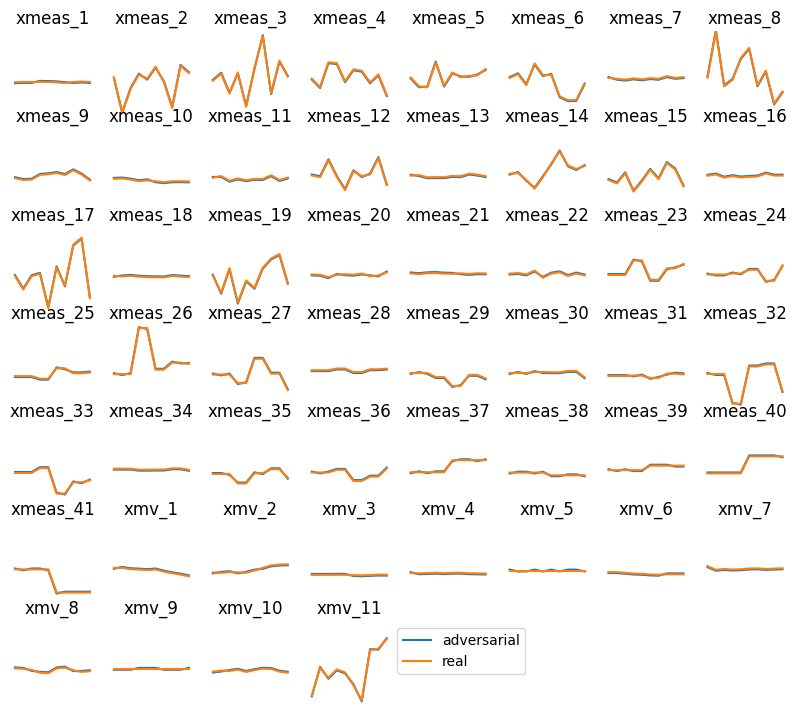

In [24]:
plt.figure(figsize=(10, 10))
for i in range(52):
    plt.subplot(8, 8, i+1)
    plt.title(dataset.df.columns[i])
    plt.plot(adv_sample.numpy()[0, :, i], label='adversarial')
    plt.plot(sample[0, :, i], label='real')
    plt.axis('off')
    plt.ylim(sample[0].min(), sample[0].max())
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Замеряем метрики на атакованных данных

In [25]:
pred = fddmodel_M.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9898/0.0001
    Fault 02: 0.9905/0.0031
    Fault 03: 0.0000/0.0003
    Fault 04: 0.9876/0.0000
    Fault 05: 0.0016/0.0014
    Fault 06: 0.9977/0.0003
    Fault 07: 0.9980/0.0000
    Fault 08: 0.9705/0.0081
    Fault 09: 0.0446/0.0824
    Fault 10: 0.9584/0.0408
    Fault 11: 0.8480/0.0014
    Fault 12: 0.6750/0.0260
    Fault 13: 0.9674/0.0102
    Fault 14: 0.9876/0.0003
    Fault 15: 0.0000/0.0000
    Fault 16: 0.0041/0.0036
    Fault 17: 0.9712/0.0000
    Fault 18: 0.8995/0.0003
    Fault 19: 0.9792/0.0001
    Fault 20: 0.9628/0.0008
    Fault 21: 0.0000/0.0000
    Fault 22: 0.2600/0.3109
    Fault 23: 0.4887/0.4616
    Fault 24: 0.9721/0.0004
    Fault 25: 0.9650/0.0004
    Fault 26: 0.8080/0.0456
    Fault 27: 0.0437/0.0002
    Fault 28: 0.0001/0.0007
Detection TPR: 0.9985
Detection FPR: 0.9993
Average Detection Delay (ADD): 0.01
Total Correct Diagnosis Rate (Total CDR): 0.6357

Clustering metrics
-----------------
Adjusted R

FP 99%